In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm

%load_ext autoreload
%autoreload 2

In [2]:
from synthetic_graphs import *
from solver import *

### Generate and test our graphs

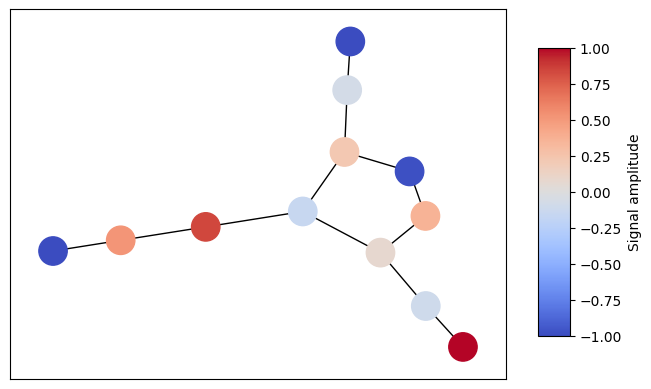

Mean and std:  (-0.02305146094543618, 0.6564163642673128)
Laplacian quadratic form:  9.160547779430251


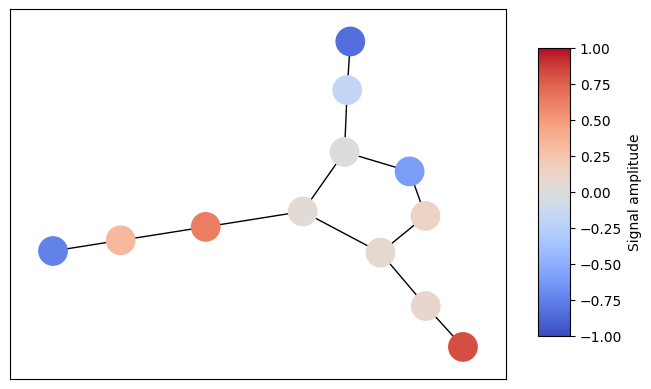

Mean and std:  (-0.02305146094543621, 0.48895199029796743)
Laplacian quadratic form:  3.475417778105817


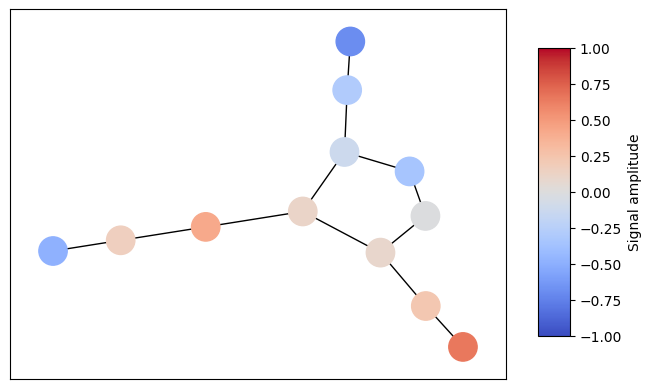

Mean and std:  (-0.023051460945436267, 0.3685168002311112)
Laplacian quadratic form:  1.1934278098762023


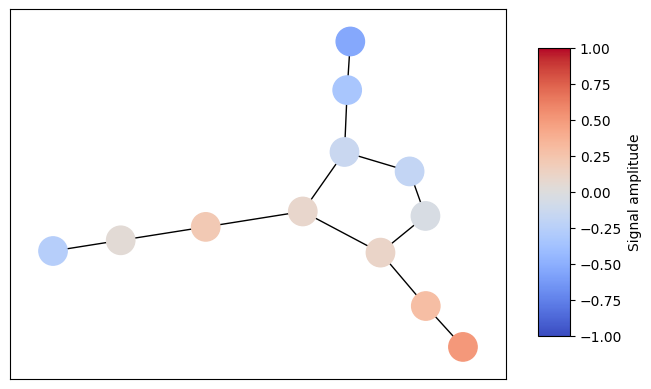

Mean and std:  (-0.023051460945436347, 0.2804226656403326)
Laplacian quadratic form:  0.3965064144156833


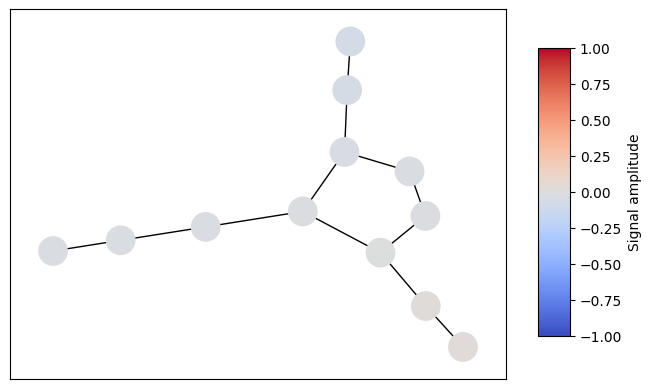

Mean and std:  (-0.02305146094543639, 0.027222644497772057)
Laplacian quadratic form:  0.0022150307295103534


In [3]:
# Input parameters
num_nodes = 12
num_edges = 12
value_range = (-1, 1)
diffusion_timesteps = [0, 2, 5, 10, 100]

# Create the graph
G0 = create_graph(num_nodes, num_edges, value_range, edge_weight_range = [1,1])

# Perform diffusion and plot the graph at each timestep
G_list = [G0]
for t in diffusion_timesteps:
    G = diffusion(G0,  diffusion_steps = t)
    G_list.append(G)
    plot_graph(G, labels=False, value_range=value_range)
    print("Mean and std: ", graph_stats(G))
    print("Laplacian quadratic form: ", signal_smoothness_on_graph(G))


In [5]:
#Sample the signal from the graph
samples = sample_signal_from_graph(G0, num_samples = 20, sampling_noise_std = 0.2)
print("Samples shape: ", samples.shape)
print("Samples: ", samples)

Samples shape:  (20, 12)
Samples:  [[ 0.34867797 -0.82667612  0.76403078  0.90341299 -0.11222191  0.33308293
   0.25110828 -0.87134718 -0.26279735 -0.66732564 -0.27988535  0.22762999]
 [ 0.64924762 -1.0217879   0.94345345  1.1228996  -0.06217638 -0.07755532
   0.14656106 -1.14843797  0.04788253 -0.97257388  0.10238135  0.3217824 ]
 [ 0.2065591  -0.68007198  0.94153909  0.76879333 -0.00207472 -0.30921202
   0.70275019 -1.02720664  0.16098551 -0.74775737  0.28416879  0.02432132]
 [ 0.42011359 -0.85201101  0.90934328  1.48418067  0.08883172 -0.11015687
   0.35047437 -1.42400227  0.47012298 -1.13463798  0.05142835  0.23196203]
 [ 0.64435087 -0.93375587  0.39371463  1.00393338 -0.27680665 -0.16830923
   0.66260747 -0.87412631 -0.22360714 -0.91613392  0.18130946  0.31788033]
 [ 0.2934573  -1.17069879  0.84438696  1.27474204 -0.07096596  0.1899282
   0.83647608 -1.01024673 -0.3904168  -0.78341661  0.26638414  0.16228953]
 [ 0.33560569 -1.0774364   1.09677663  1.04038034 -0.09372856 -0.2602901

### Test of the initial solver

In [6]:
#Initialize graph

solvers.options['show_progress'] = True
syn = synthetic_data_gen(10)
num_nodes = syn.num_vertices

np.random.seed(3)
graph_signals_er, graph_signals_ba, graph_signals_rnd = syn.get_graph_signals()


     pcost       dcost       gap    pres   dres
 0:  3.9916e+00 -1.5590e+00  8e+01  8e+00  5e+00
 1:  4.8846e+00 -2.8302e-01  5e+00  1e-15  1e-15
 2:  4.6838e+00  3.6514e+00  1e+00  3e-16  5e-16
 3:  4.3759e+00  4.2076e+00  2e-01  2e-16  3e-16
 4:  4.2996e+00  4.2889e+00  1e-02  2e-16  2e-16
 5:  4.2930e+00  4.2925e+00  5e-04  2e-16  2e-16
 6:  4.2926e+00  4.2926e+00  3e-05  3e-16  2e-16
 7:  4.2926e+00  4.2926e+00  3e-06  2e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.9733e+00 -1.5795e+00  8e+01  8e+00  5e+00
 1:  4.8659e+00 -3.0315e-01  5e+00  1e-15  9e-16
 2:  4.6650e+00  3.6310e+00  1e+00  7e-16  5e-16
 3:  4.3564e+00  4.1878e+00  2e-01  3e-16  4e-16
 4:  4.2800e+00  4.2691e+00  1e-02  4e-16  2e-16
 5:  4.2733e+00  4.2728e+00  5e-04  4e-16  3e-16
 6:  4.2730e+00  4.2729e+00  2e-05  3e-16  2e-16
 7:  4.2729e+00  4.2729e+00  3e-06  2e-16  2e-16
Optimal solution found.


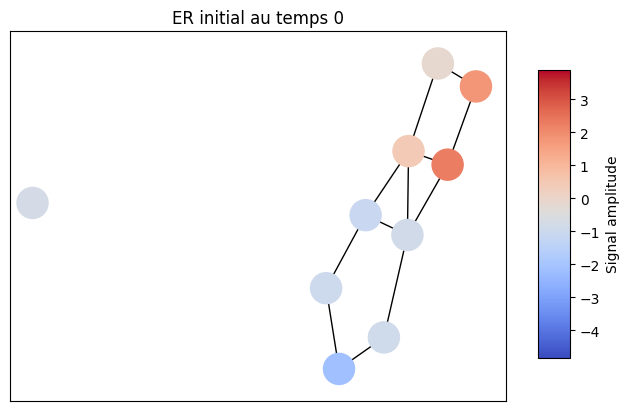

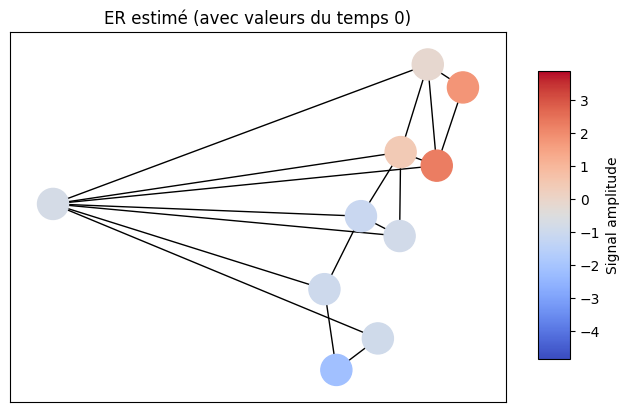

In [7]:
L_er, Y_er = gl_sig_model(graph_signals_er, 1000, syn.alpha_er, syn.beta_er)

L_er_gt = nx.laplacian_matrix(syn.er_graph)

gt_graph = syn.er_graph
est_graph = create_graph_from_laplacian(L_er)
pos = nx.spring_layout(gt_graph)
for node in gt_graph.nodes():
    gt_graph.nodes[node]['pos'] = list(pos[node])
    gt_graph.nodes[node]['value'] = graph_signals_er[0][node]
for edge in gt_graph.edges():
    gt_graph[edge[0]][edge[1]]['weight'] = 1
for node in est_graph.nodes():
    est_graph.nodes[node]['pos'] = list(pos[node])
    est_graph.nodes[node]['value'] = graph_signals_er[0][node]
for edge in est_graph.edges():
    est_graph[edge[0]][edge[1]]['weight'] = 1

plot_graph(gt_graph, [np.min(graph_signals_er), np.max(graph_signals_er)], labels=False, title="ER initial au temps 0")
plot_graph(est_graph, [np.min(graph_signals_er), np.max(graph_signals_er)], labels=False, title="ER estimé (avec valeurs du temps 0)")

     pcost       dcost       gap    pres   dres
 0: -3.0312e+00 -3.8507e+00  2e+02  1e+01  3e+00
 1:  4.9947e+00 -2.1074e+00  7e+00  2e-15  8e-16
 2:  4.1948e+00  2.1799e+00  2e+00  8e-16  5e-16
 3:  3.1841e+00  2.7169e+00  5e-01  4e-16  3e-16
 4:  2.8878e+00  2.8671e+00  2e-02  3e-16  3e-16
 5:  2.8705e+00  2.8702e+00  3e-04  3e-16  4e-16
 6:  2.8703e+00  2.8702e+00  3e-06  3e-16  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.0432e+00 -3.8667e+00  2e+02  1e+01  3e+00
 1:  4.9824e+00 -2.1229e+00  7e+00  1e-15  6e-16
 2:  4.1795e+00  2.1633e+00  2e+00  5e-16  6e-16
 3:  3.1656e+00  2.6998e+00  5e-01  2e-16  4e-16
 4:  2.8696e+00  2.8492e+00  2e-02  4e-16  4e-16
 5:  2.8525e+00  2.8523e+00  3e-04  5e-16  4e-16
 6:  2.8523e+00  2.8523e+00  3e-06  5e-16  4e-16
Optimal solution found.


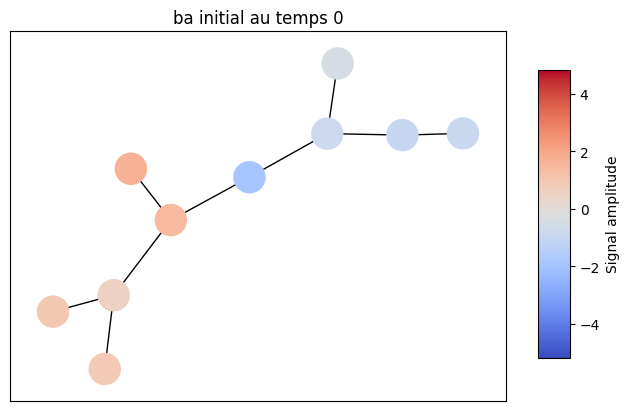

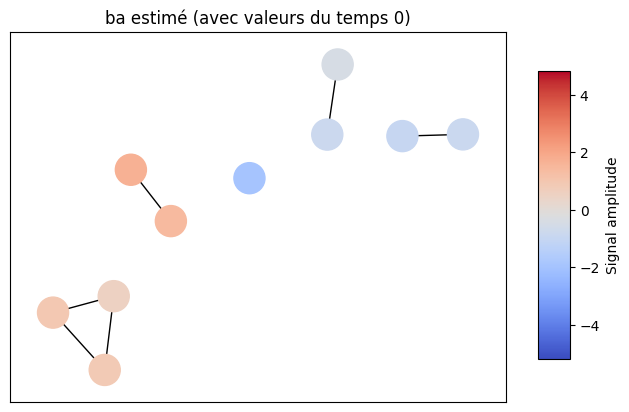

In [8]:
L_ba, Y_ba = gl_sig_model(graph_signals_ba, 1000, syn.alpha_ba, syn.beta_ba)

L_ba_gt = nx.laplacian_matrix(syn.ba_graph)

gt_graph = syn.ba_graph
est_graph = create_graph_from_laplacian(L_ba)
pos = nx.spring_layout(gt_graph)
for node in gt_graph.nodes():
    gt_graph.nodes[node]['pos'] = list(pos[node])
    gt_graph.nodes[node]['value'] = graph_signals_ba[0][node]
for edge in gt_graph.edges():
    gt_graph[edge[0]][edge[1]]['weight'] = 1
for node in est_graph.nodes():
    est_graph.nodes[node]['pos'] = list(pos[node])
    est_graph.nodes[node]['value'] = graph_signals_ba[0][node]
for edge in est_graph.edges():
    est_graph[edge[0]][edge[1]]['weight'] = 1

plot_graph(gt_graph, [np.min(graph_signals_ba), np.max(graph_signals_ba)], labels=False, title="ba initial au temps 0")
plot_graph(est_graph, [np.min(graph_signals_ba), np.max(graph_signals_ba)], labels=False, title="ba estimé (avec valeurs du temps 0)")

     pcost       dcost       gap    pres   dres
 0:  2.1825e+01  1.5797e+01  1e+02  8e+00  1e+00
 1:  2.2881e+01  1.8464e+01  1e+01  8e-01  1e-01
 2:  2.3991e+01  2.2551e+01  1e+00  2e-16  4e-16
 3:  2.3542e+01  2.3425e+01  1e-01  2e-16  2e-16
 4:  2.3474e+01  2.3469e+01  5e-03  3e-16  2e-16
 5:  2.3471e+01  2.3471e+01  7e-05  2e-16  3e-16
 6:  2.3471e+01  2.3471e+01  7e-07  2e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1454e+01  1.5426e+01  1e+02  8e+00  1e+00
 1:  2.2515e+01  1.8106e+01  1e+01  8e-01  1e-01
 2:  2.3625e+01  2.2198e+01  1e+00  3e-16  7e-16
 3:  2.3177e+01  2.3062e+01  1e-01  2e-16  2e-16
 4:  2.3111e+01  2.3106e+01  5e-03  2e-16  2e-16
 5:  2.3108e+01  2.3108e+01  7e-05  2e-16  2e-16
 6:  2.3108e+01  2.3108e+01  7e-07  2e-16  2e-16
Optimal solution found.


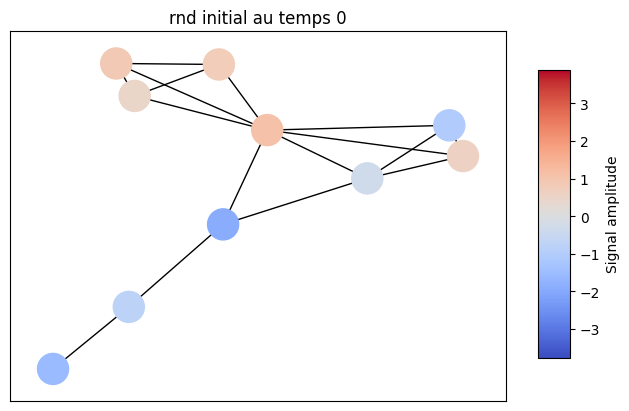

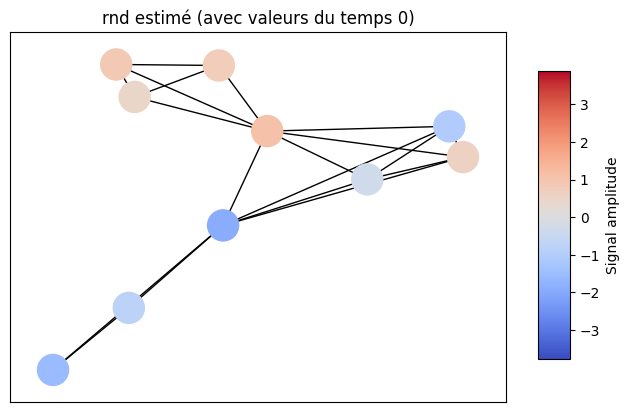

In [9]:
L_rnd, Y_rnd = gl_sig_model(graph_signals_rnd, 1000, syn.alpha_rnd, syn.beta_rnd)

L_rnd_gt = nx.laplacian_matrix(syn.random_graph)

gt_graph = syn.random_graph
est_graph = create_graph_from_laplacian(L_rnd)
pos = nx.spring_layout(gt_graph)
for node in gt_graph.nodes():
    gt_graph.nodes[node]['pos'] = list(pos[node])
    gt_graph.nodes[node]['value'] = graph_signals_rnd[0][node]
for edge in gt_graph.edges():
    gt_graph[edge[0]][edge[1]]['weight'] = 1
for node in est_graph.nodes():
    est_graph.nodes[node]['pos'] = list(pos[node])
    est_graph.nodes[node]['value'] = graph_signals_rnd[0][node]
for edge in est_graph.edges():
    est_graph[edge[0]][edge[1]]['weight'] = 1

plot_graph(gt_graph, [np.min(graph_signals_rnd), np.max(graph_signals_rnd)], labels=False, title="rnd initial au temps 0")
plot_graph(est_graph, [np.min(graph_signals_rnd), np.max(graph_signals_rnd)], labels=False, title="rnd estimé (avec valeurs du temps 0)")

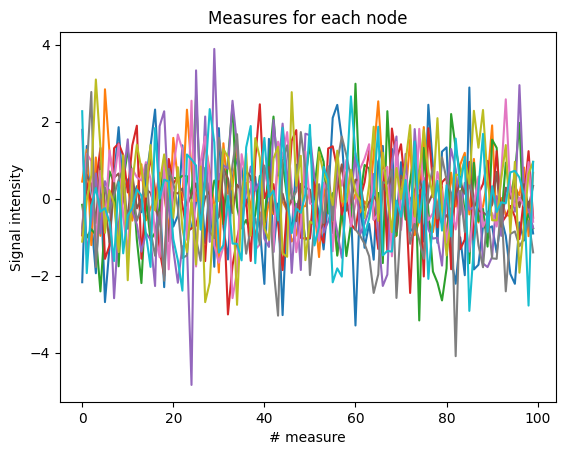

In [10]:
# Plot the 100 measures on each node
plt.figure()
for node in range(graph_signals_er.shape[1]) :
    plt.plot(graph_signals_er[:, node], label = f"Signal du noeud {node}")
# plt.legend()
plt.title("Measures for each node")
plt.xlabel("# measure")
plt.ylabel("Signal intensity")
plt.show()

### Test solver with our graphs

In [22]:
def experience(diffusion_time, alpha, beta) :
    # Graph generation
    # Input parameters
    num_nodes = 10
    num_edges = 12
    value_range = (-1, 1)
    # diffusion_time = 5
    # Create the initial graph
    G0 = create_graph(num_nodes, num_edges, value_range, edge_weight_range = [1,1])
    # Perform diffusion
    G = diffusion(G0,  diffusion_steps = diffusion_time)

    # Graph signal generation
    # Signal parameters
    num_samples = 20
    noise_std = 0.2
    # Generation
    graph_signal = sample_signal_from_graph(G, num_samples, noise_std)

    # Solver
    # Solver parameters
    max_iter = 1000
    # alpha = 1e-3
    # beta = 1e-1
    solvers.options['show_progress'] = False
    np.random.seed(3)
    # Solving
    L_est, Y_est = gl_sig_model(graph_signal, max_iter, alpha, beta)

    # Generate graph from Laplacian
    G_est = create_graph_from_laplacian(L_est, node_start = 1)
    for node in G_est.nodes():
        G_est.nodes[node]['value'] = G.nodes[node]['value'] #add signal
        G_est.nodes[node]['pos'] = G.nodes[node]['pos'] #keep same position as initial
    for edge in G_est.edges():
        G_est[edge[0]][edge[1]]['weight'] = 1 #Add weight of 1 (not etsimated)

    plot_graph(G, value_range=value_range, labels=False, title=f"Initial graph with {diffusion_time} diffusion steps(time 0)")
    plot_graph(G_est, value_range=value_range, labels=False, title="Estimated graph (time 0)")

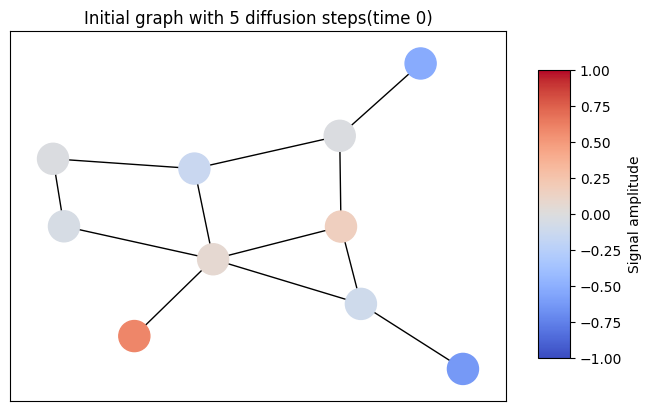

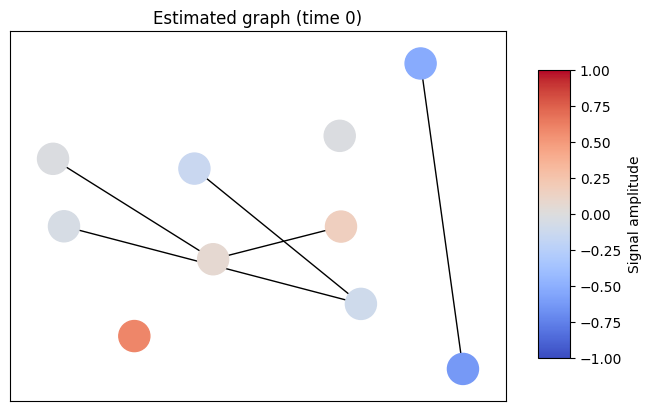

In [26]:
diffusion_time = 5
alpha = 0.1 # Ordre de grandeur de data_loader self.alpha_X
beta = 0.01 # Ordre de grandeur de data_loader self.beta_X
experience(diffusion_time, alpha, beta)